In [1]:
import pandas as pd
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("sonar.all-data",header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
123,0.0270,0.0163,0.0341,0.0247,0.0822,0.1256,0.1323,0.1584,0.2017,0.2122,...,0.0189,0.0204,0.0085,0.0043,0.0092,0.0138,0.0094,0.0105,0.0093,M
14,0.0124,0.0433,0.0604,0.0449,0.0597,0.0355,0.0531,0.0343,0.1052,0.2120,...,0.0083,0.0057,0.0174,0.0188,0.0054,0.0114,0.0196,0.0147,0.0062,R
38,0.0123,0.0022,0.0196,0.0206,0.0180,0.0492,0.0033,0.0398,0.0791,0.0475,...,0.0125,0.0134,0.0026,0.0038,0.0018,0.0113,0.0058,0.0047,0.0071,R
44,0.0257,0.0447,0.0388,0.0239,0.1315,0.1323,0.1608,0.2145,0.0847,0.0561,...,0.0096,0.0153,0.0096,0.0131,0.0198,0.0025,0.0199,0.0255,0.0180,R
10,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,R


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [5]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [11]:
df[60]=df[60].map({'M':1,'R':0})
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop(columns=60, axis=1)
y = df[60]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [14]:
X_train.shape

(156, 60)

In [15]:
y_train.values

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0], dtype=int64)

In [16]:
#Convert the dataframe to numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [17]:
type(X_train)

numpy.ndarray

In [41]:
##Convert the numpy array to tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test =torch.tensor(y_test, dtype=torch.long)

C:\Users\Anirudh\AppData\Local\Temp\ipykernel_23120\2553973606.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\Anirudh\AppData\Local\Temp\ipykernel_23120\2553973606.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
C:\Users\Anirudh\AppData\Local\Temp\ipykernel_23120\2553973606.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
C:\Users\Anirudh\AppData\Local\Temp\ipykernel

In [32]:
type(X_train)

torch.Tensor

In [42]:
#Create tensor datasets
train = TensorDataset(X_train, y_train)
test = TensorDataset(X_test, y_test)

#Create Dataloaders
train_loader = DataLoader(train, batch_size=16, shuffle=True)
test_loader = DataLoader(test, batch_size=16, shuffle=True)

In [34]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Linear(60,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,2)#Final output without activation for classification
            
        )

    def forward(self,x):
        return self.network(x)
        

In [43]:
##Training the model
def train_model(model,train_loader,val_loader,criterion,optimizer,epochs=20):
    train_losses,val_losses,val_accuracies=[],[],[]
    for epoch in range(epochs):
        model.train()
        running_loss=0.0
        for inputs,labels in train_loader:
            optimizer.zero_grad()
            outputs=model(inputs)
            labels=labels.long()
            loss=criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
        train_losses.append(running_loss/len(train_loader))
        model.eval()
        val_loss=0.0
        y_pred,y_true=[],[]
        with torch.no_grad():
            for inputs,labels in val_loader:
                outputs=model(inputs)
                loss=criterion(outputs,labels)
                val_loss+=loss.item()
                _,predicted=torch.max(outputs.data,1)
                y_pred.extend(predicted.cpu().numpy())
                y_true.extend(labels.cpu().numpy())
        val_losses.append(val_loss/len(val_loader))
        val_accuracy=accuracy_score(y_true,y_pred)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f} - Val Accuracy: {val_accuracies[-1]:.4f}")

    return train_losses,val_losses,val_accuracies

Epoch 1/20 - Train Loss: 0.6978 - Val Loss: 0.6837 - Val Accuracy: 0.5577
Epoch 2/20 - Train Loss: 0.6799 - Val Loss: 0.6690 - Val Accuracy: 0.5192
Epoch 3/20 - Train Loss: 0.6728 - Val Loss: 0.6732 - Val Accuracy: 0.5192
Epoch 4/20 - Train Loss: 0.6561 - Val Loss: 0.6304 - Val Accuracy: 0.6731
Epoch 5/20 - Train Loss: 0.6385 - Val Loss: 0.6162 - Val Accuracy: 0.7308
Epoch 6/20 - Train Loss: 0.6105 - Val Loss: 0.5987 - Val Accuracy: 0.6923
Epoch 7/20 - Train Loss: 0.5792 - Val Loss: 0.5575 - Val Accuracy: 0.7692
Epoch 8/20 - Train Loss: 0.5438 - Val Loss: 0.5213 - Val Accuracy: 0.6923
Epoch 9/20 - Train Loss: 0.5066 - Val Loss: 0.5318 - Val Accuracy: 0.7115
Epoch 10/20 - Train Loss: 0.4670 - Val Loss: 0.5643 - Val Accuracy: 0.7885
Epoch 11/20 - Train Loss: 0.4477 - Val Loss: 0.4790 - Val Accuracy: 0.7500
Epoch 12/20 - Train Loss: 0.4245 - Val Loss: 0.4328 - Val Accuracy: 0.7500
Epoch 13/20 - Train Loss: 0.4063 - Val Loss: 0.4164 - Val Accuracy: 0.7500
Epoch 14/20 - Train Loss: 0.3747 -

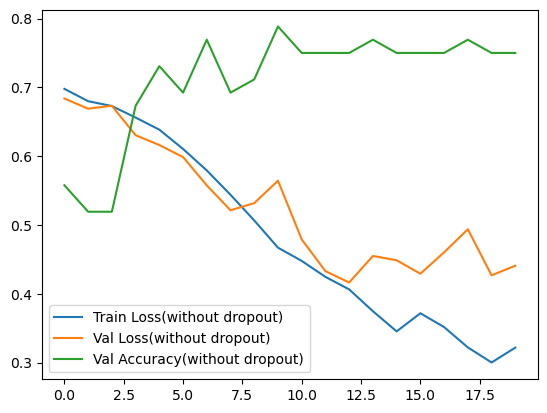

In [44]:
#Initialize and train the model without dropout
model_without_dropout=SimpleNN()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model_without_dropout.parameters(),lr=0.001)

train_losses_no_dropout,val_losses_no_dropout,val_accuracies_no_dropout=train_model(model_without_dropout,train_loader,test_loader,criterion,optimizer,epochs=20)

#PLot training and validation loss and accuracy(without dropout)
plt.plot(train_losses_no_dropout,label="Train Loss(without dropout)")
plt.plot(val_losses_no_dropout,label="Val Loss(without dropout)")
plt.plot(val_accuracies_no_dropout,label="Val Accuracy(without dropout)")
plt.legend()
plt.show()

In [45]:
##As you can see the model without dropout is overfitting the training data if we look at the Val Loss and Train Loss plots,Train Loss is going down and val loss is going up and down indicating overfitting

In [46]:
class SimpleNNWithDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Linear(60,128),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(64,2)#Final output without activation for classification
            
        )

    def forward(self,x):
        return self.network(x)

Epoch 1/20 - Train Loss: 0.6922 - Val Loss: 0.6858 - Val Accuracy: 0.5192
Epoch 2/20 - Train Loss: 0.6819 - Val Loss: 0.6830 - Val Accuracy: 0.5192
Epoch 3/20 - Train Loss: 0.6846 - Val Loss: 0.6614 - Val Accuracy: 0.5192
Epoch 4/20 - Train Loss: 0.6693 - Val Loss: 0.6633 - Val Accuracy: 0.5769
Epoch 5/20 - Train Loss: 0.6725 - Val Loss: 0.6694 - Val Accuracy: 0.5962
Epoch 6/20 - Train Loss: 0.6660 - Val Loss: 0.6494 - Val Accuracy: 0.5769
Epoch 7/20 - Train Loss: 0.6372 - Val Loss: 0.6435 - Val Accuracy: 0.6923
Epoch 8/20 - Train Loss: 0.6351 - Val Loss: 0.6279 - Val Accuracy: 0.6731
Epoch 9/20 - Train Loss: 0.6095 - Val Loss: 0.5936 - Val Accuracy: 0.7500
Epoch 10/20 - Train Loss: 0.6044 - Val Loss: 0.5819 - Val Accuracy: 0.6923
Epoch 11/20 - Train Loss: 0.5634 - Val Loss: 0.5910 - Val Accuracy: 0.7692
Epoch 12/20 - Train Loss: 0.5716 - Val Loss: 0.5538 - Val Accuracy: 0.6923
Epoch 13/20 - Train Loss: 0.5429 - Val Loss: 0.5436 - Val Accuracy: 0.7692
Epoch 14/20 - Train Loss: 0.5105 -

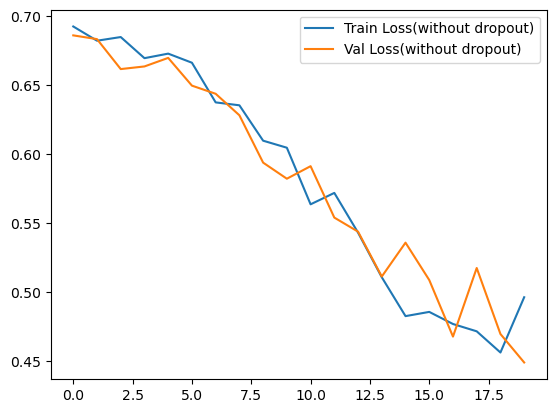

In [48]:
#Initialize and train the model without dropout
model_without_dropout=SimpleNNWithDropout()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model_without_dropout.parameters(),lr=0.001)

train_losses_no_dropout,val_losses_no_dropout,val_accuracies_no_dropout=train_model(model_without_dropout,train_loader,test_loader,criterion,optimizer,epochs=20)

#PLot training and validation loss and accuracy(without dropout)
plt.plot(train_losses_no_dropout,label="Train Loss(without dropout)")
plt.plot(val_losses_no_dropout,label="Val Loss(without dropout)")
# plt.plot(val_accuracies_no_dropout,label="Val Accuracy(without dropout)")
plt.legend()
plt.show()

In [50]:
##You can see that the overfiiting problem is solved with dropout,because each neuron is going to learn different things and the model is not overfitting,when we are dropping out 50% of the neurons the train loss is bound to increase because the model is learning different things